In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
x = [0.17453, 0.52360, 0.87267, 1.22173, 1.57080, 1.91986, 2.26893]
y = [0.00162, 0.00252, 0.00498, 0.01290, 0.03964, 0.12070, 0.34097]


In [49]:
matrix = np.empty((0, len(x)), float)
print matrix

[]


In [65]:
print [i*2 for i in range(len(x))] //такие вставки будут и далее, чтобы вам было понятнее, если вам
не приходилось работать с питоном. Помечать их буду словом "вставка".

[0, 2, 4, 6, 8, 10, 12]


In [50]:
for j in range(len(x)):
    matrix = np.append(matrix, np.array([[x[j]**(len(x) - i - 1) for i in range(len(x))]]), axis = 0)
print matrix

[[  2.82631480e-05   1.61938624e-04   9.27855518e-04   5.31630962e-03
    3.04607209e-02   1.74530000e-01   1.00000000e+00]
 [  2.06061960e-02   3.93548435e-02   7.51620387e-02   1.43548584e-01
    2.74156960e-01   5.23600000e-01   1.00000000e+00]
 [  4.41672417e-01   5.06116192e-01   5.79962864e-01   6.64584394e-01
    7.61552929e-01   8.72670000e-01   1.00000000e+00]
 [  3.32545771e+00   2.72192523e+00   2.22792698e+00   1.82358376e+00
    1.49262419e+00   1.22173000e+00   1.00000000e+00]
 [  1.50219169e+01   9.56322696e+00   6.08812514e+00   3.87581177e+00
    2.46741264e+00   1.57080000e+00   1.00000000e+00]
 [  5.00745853e+01   2.60824150e+01   1.35855818e+01   7.07633982e+00
    3.68586242e+00   1.91986000e+00   1.00000000e+00]
 [  1.36435248e+02   6.01319776e+01   2.65023503e+01   1.16805500e+01
    5.14804334e+00   2.26893000e+00   1.00000000e+00]]


In [51]:
b = np.array(y).transpose()
interpolation_c = np.linalg.solve(matrix, b)

In [52]:
print interpolation_c

[ 0.01117457 -0.04981626  0.10945434 -0.12270162  0.07479615 -0.01939146
  0.00328456]


In [53]:
deriv = np.zeros(len(x), float)
print deriv


[ 0.  0.  0.  0.  0.  0.  0.]


In [91]:
print np.sum([1, 2]) //вставка

3


In [54]:
for i in range(len(interpolation_c)):
    deriv[i] = np.sum([(len(x)-j-1)*interpolation_c[j]*(x[i]**(len(x)-j-2)) for j in range(len(x))])
print deriv

[-0.00238853  0.00478181  0.01126439  0.03988745  0.12897067  0.37400919
  0.96940374]


In [60]:
spline_matrix = np.empty((0, 4), float)

In [61]:
def calc_spline(x1, x2, y1, y2, dy1, dy2):
    return np.linalg.solve([[x1**3, x1**2, x1, 1], [x2**3, x2**2, x2, 1], [3*x1**2, 2*x1, 1, 0],
                            [3*x2**2, 2*x2, 1, 0]], np.array([y1, y2, dy1, dy2]))

In [62]:
for i in range(len(x)-1):
    spline_matrix = np.append(spline_matrix, [calc_spline(x[i], x[i+1], y[i], y[i+1], deriv[i], deriv[i+1])], axis = 0)

In [63]:
print spline_matrix

[[ -2.26777729e-02   3.40186884e-02  -1.21907534e-02   2.83198048e-03]
 [  1.60164870e-02  -2.42595055e-02   1.70132692e-02  -2.03637952e-03]
 [  4.73792123e-02  -1.07846341e-01   9.12475907e-02  -2.40058233e-02]
 [  1.28445099e-01  -4.10429393e-01   4.67594464e-01  -1.79987739e-01]
 [  3.16247302e-01  -1.30486999e+00   1.88741246e+00  -9.31169802e-01]
 [  6.67820199e-01  -3.34320812e+00   5.82651216e+00  -3.46850512e+00]]


In [64]:
x_range = np.arange(x[0], x[-1], (x[-1] - x[0])/10000)

In [65]:
    def polynom(x):
        y = 0
        for i in range(len(interpolation_c)):
            y += interpolation_c[i]*x**(len(interpolation_c)-i-1)
        return y


In [66]:
%matplotlib inline

In [67]:
y_polynomial_interpolation = [polynom(x) for x in x_range]

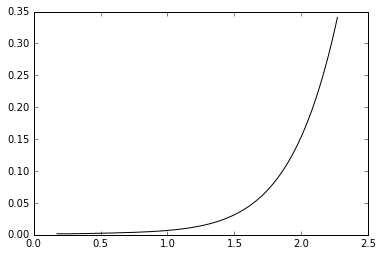

In [68]:
plt.plot(x_range, y_polynomial_interpolation, "black")

In [96]:
data_x = [0.17453, 0.52360, 0.87267, 1.22173, 1.57080, 1.91986, 2.26893]
data_y = [0.00162, 0.00252, 0.00498, 0.01290, 0.03964, 0.12070, 0.34097]

In [97]:
def value_of_polynomial(polynomial, x):
# calculating the value of polynomial in point x
    ret = 0
    for i in range(len(polynomial)):
        ret += polynomial[i]*x**(len(polynomial)-i-1)
    return ret
def find_left_point(x):
# searches for the nearest x from data_x on the left
    for i in range(len(data_x)-1):
        if (data_x[i] <= x) and (data_x[i+1] >= x):
            return i
    print("find_left_point: not found")


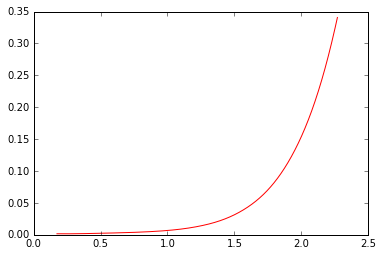

In [98]:
y_spline_interpolation = [value_of_polynomial(spline_matrix[find_left_point(x)], x) for x in x_range]
plt.plot(x_range, y_spline_interpolation, "red")

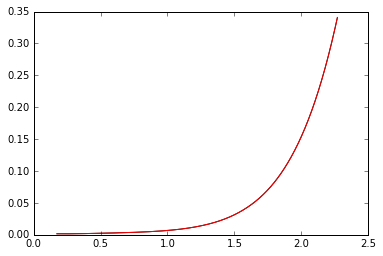

In [99]:
plt.plot(x_range, y_polynomial_interpolation, "black")
plt.plot(x_range, y_spline_interpolation, "red")